<a href="https://colab.research.google.com/github/XaviPat01/MTL782_Data_Mining/blob/main/MTL782_Assignment1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MTL782: Assignment 1, Question 2**
Members:
- Saurabh Jha, 2020MT10845
- Vishvesh Patel, 2020MT60896
- Avi Patni, 2020MT60159


## Step 1: **Importing Necessary Libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_score, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from keras.datasets import mnist
from sklearn.svm import LinearSVC, SVC

## Step 2: **Load the MNIST Dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("Shape of training data", X_train.shape)
print("Shape of training labels", y_train.shape)
print("Shape of testing data", X_test.shape)
print("Shape os testing labels", y_test.shape)

Shape of training data (60000, 28, 28)
Shape of training labels (60000,)
Shape of testing data (10000, 28, 28)
Shape os testing labels (10000,)


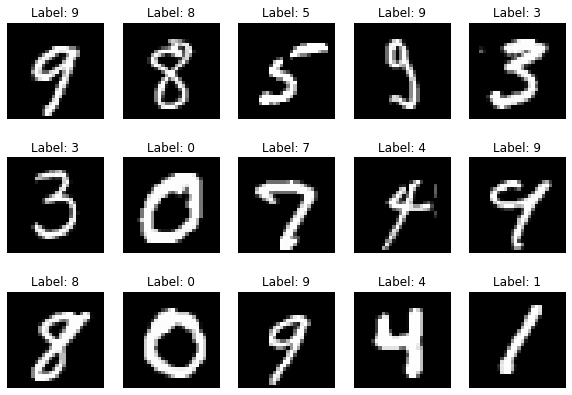

In [8]:
#Plotting the digits
fig = plt.figure(figsize=(10,7))
for i in range(45,60):
  ax = fig.add_subplot(3,5,i-45+1)
  ax.imshow(X_train[i],cmap=plt.get_cmap('gray'))
  ax.set_title('Label: {y}'.format(y=y_train[i]))
  plt.axis('off')

## Preparing the dataset
We need to flatten the dataset to a 1D-array, thus each image of 28*28 would become a 1D array of 784

In [4]:
x_train = X_train.flatten().reshape(60000,784)
x_test = X_test.flatten().reshape(10000,784)

# Naive Bayes

In [7]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_predicted=nb.predict(x_test)

Accuracy = 83.65 %
Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.75      0.79       982
           5       0.86      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.94      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.86      0.78      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.84     10000
weighted avg       0.84      0.84      0.84     10000



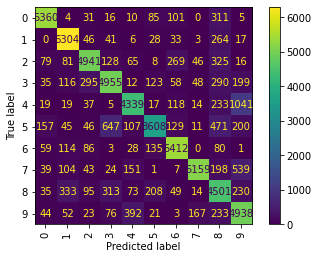

In [8]:
print ("Accuracy = {} %".format(metrics.accuracy_score(y_test, y_predicted)*100))
print ("Classification Report \n {}".format(metrics.classification_report(y_test, y_predicted, labels=range(0,10))))
ConfusionMatrixDisplay.from_estimator(nb,x_train,y_train,display_labels = range(0,10),xticks_rotation='vertical')
plt.show()

# KNN

let's search for "k" using cross-validation

Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scaled, the feature with a higher value range starts dominating when calculating distances. KNN which uses Euclidean distance is one such algorithm which essentially require scaling

In [ ]:
pipe_knn = make_pipeline(MinMaxScaler(),KNeighborsClassifier())
grid_k = {'kneighborsclassifier__n_neighbors':[3,5,7,9]}
cv = GridSearchCV(pipe_knn, param_grid = grid_k, scoring = 'precision_macro', cv = 3, verbose = 1, n_jobs = 3)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=3,
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7, 9]},
             scoring='precision_macro', verbose=1)

the best value for k is 7

In [ ]:
print(cv.cv_results_)
print("The optimal value for k is ", cv.best_params_)
print("The best estimator is", cv.best_estimator_)

{'mean_fit_time': array([1.96862531, 1.38104169, 1.48193097, 1.19494748]), 'std_fit_time': array([0.11792844, 0.22850503, 0.18926723, 0.10178511]), 'mean_score_time': array([171.5782783 , 169.10254987, 166.08259702, 169.45981725]), 'std_score_time': array([2.164737  , 1.00511434, 0.63652458, 0.51567761]), 'param_kneighborsclassifier__n_neighbors': masked_array(data=[3, 5, 7, 9],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'kneighborsclassifier__n_neighbors': 3}, {'kneighborsclassifier__n_neighbors': 5}, {'kneighborsclassifier__n_neighbors': 7}, {'kneighborsclassifier__n_neighbors': 9}], 'split0_test_score': array([0.96949718, 0.96827352, 0.96570136, 0.96458058]), 'split1_test_score': array([0.96834206, 0.96737274, 0.96490717, 0.96337869]), 'split2_test_score': array([0.96787639, 0.96812803, 0.96669261, 0.96576967]), 'mean_test_score': array([0.96857188, 0.96792476, 0.96576704, 0.96457631]), 'std_test_score': array([0.000

In [ ]:
pipe_knn = cv.best_estimator_

## Multi-Class Classification

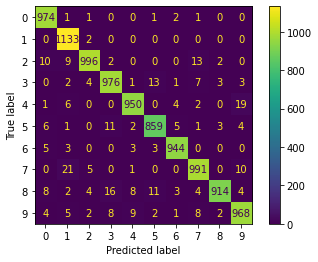

In [ ]:
pipe_knn.fit(x_train,y_train)
y_hat = pipe_knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_hat)
plt.show()

In [ ]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# SVC

In [10]:
#Flatten to length 784
svc_x_train = x_train[0:10000,:]
svc_y_train = y_train[0:10000]
svc_x_test = x_test[0:2000,:]
svc_y_test = y_test[0:2000]

In [13]:
pipe_1 = Pipeline([('scaler', MinMaxScaler()),("classifier",LinearSVC(random_state=42, tol=1e-4, max_iter = 8000))])
pipe_1.fit(x_train, y_train.ravel())

# acc = cross_val_score(pipe_1, x_train,y_train.ravel(),cv=2)
# print("Training accuracy: {:.2f} %".format(acc.mean()*100))

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', LinearSVC(max_iter=8000, random_state=42))])

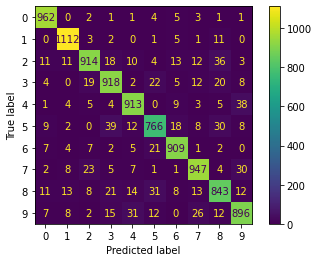

In [14]:
y_pred=pipe_1.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [15]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.92      0.93      0.92       982
           5       0.89      0.86      0.87       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.87      0.87      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# Decision Tree and Random Forest Classifier

In [18]:
# X_train = X_train.reshape(X_train.shape[0],28*28)
# X_test = X_test.reshape(X_test.shape[0],28*28)
# X_train = X_train/255
# X_test = X_test/255
cv = ShuffleSplit(n_splits=10, test_size =0.2,random_state=42)
def train_classifiers(estimator , x_train,y_train,cv,name):
  estimator.fit(x_train,y_train)
  cv_train_score = cross_val_score(estimator,x_train,y_train,cv=cv,scoring='precision_macro',n_jobs=5)
  print(f"On an average,{name} model has (f1) precision score of "f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the target")

In [19]:
def eval(estimator,x_test,y_test):
  y_pred = estimator.predict(x_test)
  print("# Classification Report")
  print(metrics.classification_report(y_test,y_pred))
  print("# Confusion Matrix")
  disp = ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_test,y_pred))
  disp.plot()
  plt.title('Confusion Matrix')
  plt.show()

In [20]:
decision_tree_pipeline = Pipeline([("classifier",DecisionTreeClassifier())])
# train_classifiers(decision_tree_pipeline,X_train,y_train.ravel(),cv,"Decision Tree")
train_classifiers(decision_tree_pipeline, x_train, y_train.ravel(),cv,"Decision Tree")

On an average,Decision Tree model has (f1) precision score of 0.867 +/- 0.003 on the target


# Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.96      0.96      0.96      1135
           2       0.88      0.85      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.88      0.87       982
           5       0.84      0.85      0.84       892
           6       0.90      0.89      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.82       974
           9       0.86      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

# Confusion Matrix


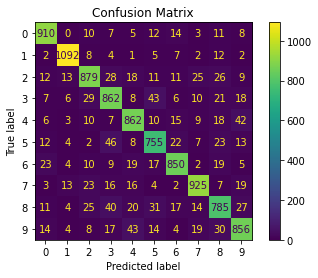

In [21]:
eval(decision_tree_pipeline,x_test,y_test)

In [ ]:
randomforest_pipeline = Pipeline([("classifier",RandomForestClassifier())])
train_classifiers(randomforest_pipeline,x_train,y_train.ravel(),cv,"Random Forest Classifier")

On an average,Random Forest Classifier model has (f1) precision score of 0.967 +/- 0.001 on the target


# Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

# Confusion Matrix


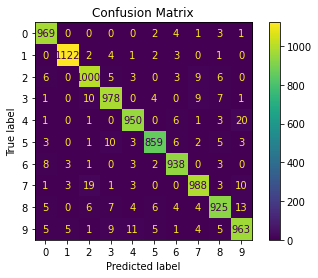

In [ ]:
eval(randomforest_pipeline,x_test,y_test)

# ANN

In [22]:
# ANN
import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.neural_network import MLPClassifier
pipe_ann = make_pipeline(MinMaxScaler(), MLPClassifier(solver = 'sgd', alpha = 1e-4, max_iter=12, hidden_layer_sizes = (40,9), learning_rate_init = 0.2, random_state = 42))
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    pipe_ann.fit(x_train, y_train)

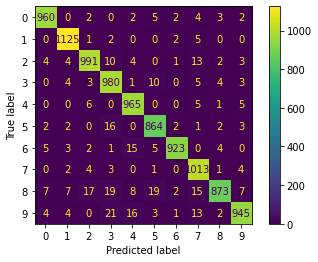

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.93      0.97      0.95      1010
           4       0.95      0.98      0.97       982
           5       0.95      0.97      0.96       892
           6       0.99      0.96      0.98       958
           7       0.94      0.99      0.96      1028
           8       0.98      0.90      0.94       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [23]:
y_pred = pipe_ann.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(metrics.classification_report(y_test, y_pred))